In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple
import os
import matplotlib.lines as mlines

In [4]:
graph_title = "FTIR No NP"

In [5]:
def read_asp(file_path:str) -> Tuple[np.array, np.array]:
    """
    Read an asp file created with X machine
    Args:
        file_path: the path pointing towards a text file that has
        the following format:
            line 0: number of points (int)
            line 1: x_start (float)
            line 2: x_end (float)
            line 3: ? (int)
            line 4: ? (int)
            line 5: ? (int)
            lines 6-end: y_data (float)
    return: tuple with two numpy arrays (x, y)
    """
    with open(file_path, mode="r") as file:
        n_data_points = int(next(file))
        x_start = float(next(file))
        x_end = float(next(file))
        _ = int(next(file)) # only specified to ignore those lines
        _ = int(next(file))
        _ = int(next(file))
        y_data = [float(i) for i in file]
        assert len(y_data) == n_data_points, f"The number of expected y_values is {n_data_points}, but {len(y_data)} were found"
    x = np.linspace(x_start, x_end, n_data_points)
    y = np.array(y_data)
    return x, y

def plot_many_ftir(title, *file_paths, size=(5,5), 
                  xlabel="Wavelength (nm)", ylabel="Absorbance"):
    """Returns a figure"""
    fig = plt.figure(figsize=size)
    #ax, unused = fig.subplots(2, 1, sharex=True) # This can create multiple plots in a single figure
    ax = fig.subplots(sharex=True)
    for fp,l in file_paths:
        x, y = read_asp(fp)
        ax.plot(x,y, label=l)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(which='both', axis='both')
    plt.xlim(400,2000)
    plt.ylim((0,1.2))
    blue_line = mlines.Line2D([], [], color='tab:blue', label="Y$_2$O$_3$:Nd2% + APTES")
    orange_line = mlines.Line2D([], [], color='tab:orange', label="Y$_2$O$_3$:Nd2%")
    plt.legend()
    #fig.savefig(line_name)
    return fig

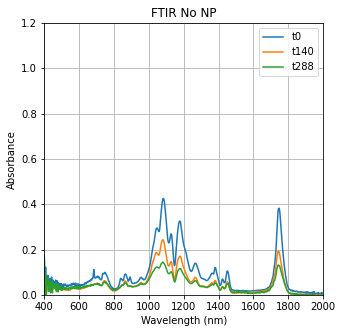

In [6]:
fig_many_ftir = plot_many_ftir(graph_title,
(r"C:\Users\YaelSuarez\OneDrive - Karolinska Institutet\Documents\KI\Experiments\FTIR\Biomineralization PLGA 13% NP 20%\t0 No NP.asp", "t0"),
(r"C:\Users\YaelSuarez\OneDrive - Karolinska Institutet\Documents\KI\Experiments\FTIR\Biomineralization PLGA 13% NP 20%\t140 No NP.asp", "t140"),
(r"C:\Users\YaelSuarez\OneDrive - Karolinska Institutet\Documents\KI\Experiments\FTIR\Biomineralization PLGA 13% NP 20%\t288 No NP_2022-03-11T15-51-50.asp", "t288")
)
